Shape of the dataset (904, 42)
dataset variable types: Artist Popularity        int64
Artist Genres           object
Track Duration(ms)       int64
Track Popularity         int64
Danceability           float64
Energy                 float64
Key                      int64
Loudness               float64
Mode                     int64
Speechiness            float64
Acousticness           float64
Instrumentalness       float64
Liveness               float64
Valence                float64
Tempo                  float64
Time_signature           int64
Lyrics                  object
Average1               float64
Average2               float64
Average3               float64
Average4               float64
Average5               float64
Varience1              float64
Varience2              float64
Varience3              float64
Varience4              float64
Varience5              float64
Standard Deviation1    float64
Standard Deviation2    float64
Standard Deviation3    float64
Standard Deviat

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Filtered DataFrame:
     Artist Popularity  Track Popularity  Danceability  Energy  Loudness  \
0                   69                88         0.671   0.876    -5.681   
1                   71                76         0.840   0.629    -6.629   
2                   65                69         0.729   0.581    -8.235   
3                   68                54         0.520   0.384    -8.168   
4                   61                82         0.626   0.583    -7.346   
..                 ...               ...           ...     ...       ...   
899                 88                87         0.367   0.111   -14.084   
900                100                84         0.392   0.574    -9.195   
901                 89                96         0.788   0.758    -6.513   
902                 89                69         0.740   0.781    -5.302   
903                 56                73         0.448   0.632    -4.083   

     Mode  Speechiness  Acousticness  Standard Deviation1  366  ...

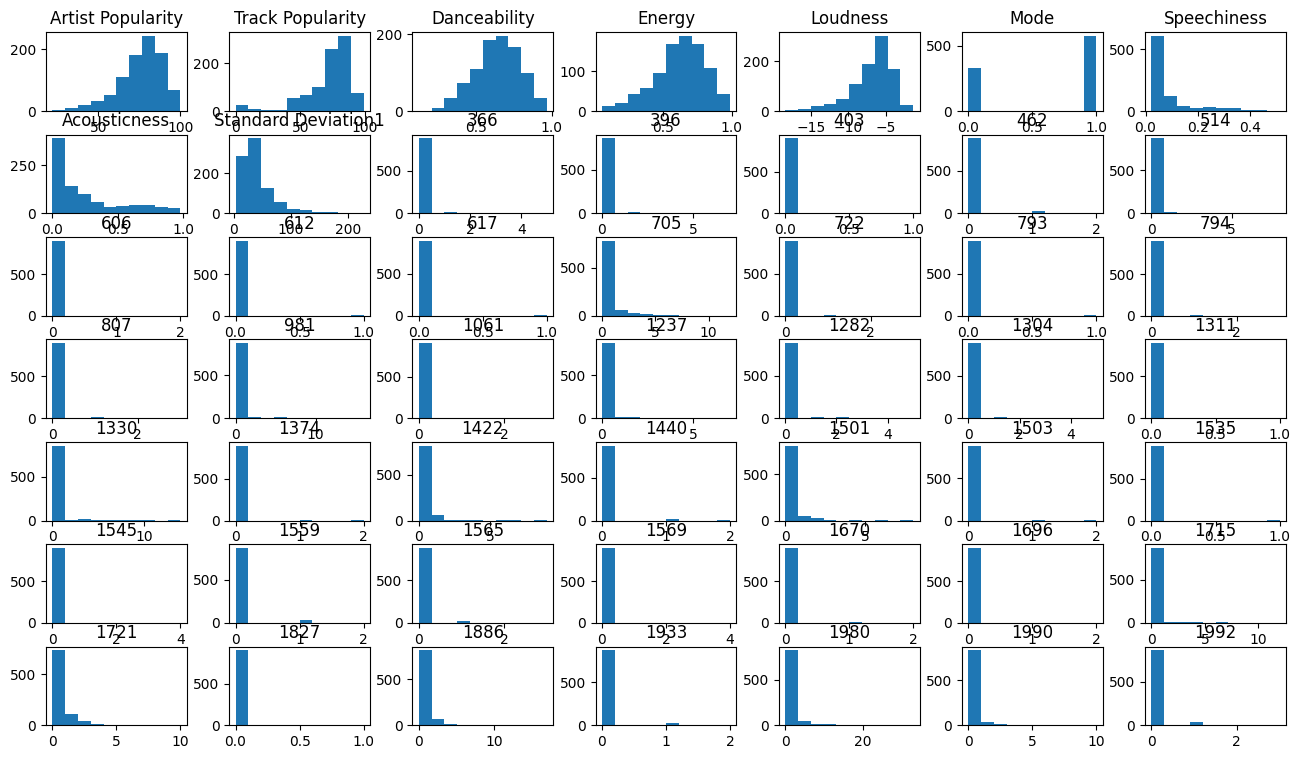

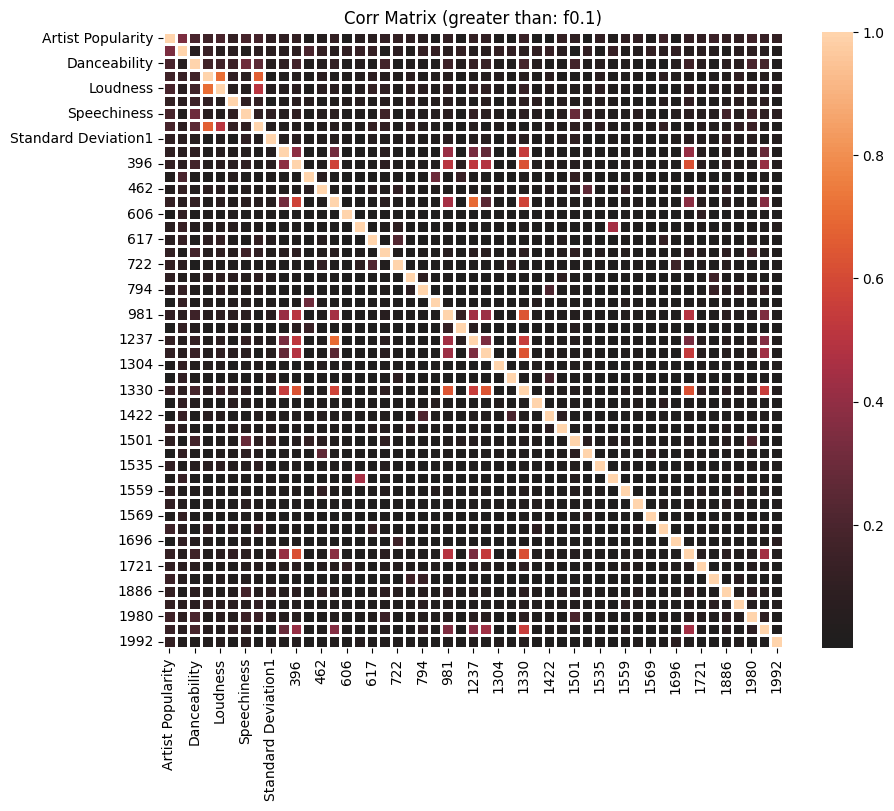

<Figure size 500x500 with 0 Axes>

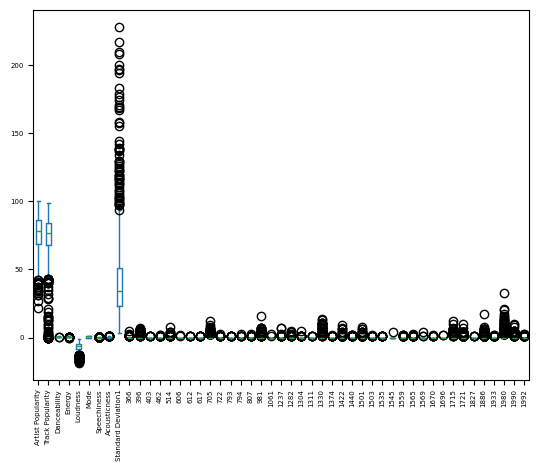

In [1]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------
# 25.04.2024 - Hüseyin Sezerol
#---------------------------------------------------------------------------------------------------------------------------------------------------------
# Libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import ARDRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import time
import statsmodels.api as sm

from sklearn.impute import KNNImputer


import time
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

df = pd.read_csv("Music Informations and Lyrics_ from Spotify and Musixmatch.csv")
df = df.drop(columns=["Track Name","Artist","Track Popularity Output","Artist Popularity Output","Release Date"])
df['Artist Genres'] = df['Artist Genres'].astype(str)
df['Lyrics'] = df['Lyrics'].astype(str)
data = df

print("Shape of the dataset",data.shape)
print("dataset variable types:",data.dtypes)
print("first 10 rows of the dataset")
print(data.head(10))
print("statistical data of the dataset")
description=data.describe()
print(description)


from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')
from nltk.corpus import stopwords
genres = []
for i in range(904):
    genre = re.sub('[^a-zA-Z]',' ',data['Artist Genres'][i])
    genre = genre.lower()
    genre = genre.split()
    genre = [ps.stem(word) for word in genre if not word in set(stopwords.words('english'))]
    genre = ' '.join(genre)
    genres.append(genre)
lyrics = []
for i in range(904):
    lyric = re.sub('[^a-zA-Z]',' ',data['Lyrics'][i])
    lyric = lyric.lower()
    lyric = lyric.split()
    lyric = [ps.stem(word) for word in lyric if not word in set(stopwords.words('english'))]
    lyric = ' '.join(lyric)
    lyrics.append(lyric) 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
genres = cv.fit_transform(genres).toarray()
genres = pd.DataFrame(genres)
lyrics = cv.fit_transform(lyrics).toarray()
lyrics = pd.DataFrame(lyrics)
data = data.drop(columns=["Artist Genres","Lyrics"])
data = pd.concat([data,genres],axis=1)
data = pd.concat([data,lyrics],axis=1)

correlation_matrix = data.corr()

correlation_with_target1 = correlation_matrix['Artist Popularity'].abs().sort_values(ascending=False)
correlation_with_target2 = correlation_matrix['Track Popularity'].abs().sort_values(ascending=False)

threshold = 0.1

columns_to_drop_target1 = correlation_with_target1[correlation_with_target1 < threshold].index
columns_to_drop_target2 = correlation_with_target2[correlation_with_target2 < threshold].index

columns_to_drop = set(columns_to_drop_target1).intersection(columns_to_drop_target2)

df_filtered = data.drop(columns=columns_to_drop)
print("Filtered DataFrame:")
print(df_filtered)
df_filtered.to_csv("09_MusicRating_Dataset.csv", index=False)

df_filtered.hist(bins=10,figsize=(16,9),grid=False)
# Heatmap
plt.figure(figsize=(10, 8))
corr2=np.abs(df_filtered.corr(method='pearson'))
sns.heatmap(corr2, annot=False, fmt=".2f", linewidths=0.9, center=0)
plt.title(f"Corr Matrix (greater than: f{threshold})")
plt.figure(figsize=(5, 5))
ax = df_filtered.plot(kind='box', subplots=False, fontsize=5)
ax.set_xticklabels(df_filtered.columns, rotation=90)

datas=pd.read_csv('09_MusicRating_Dataset.csv')
inputs = datas.iloc[:,2:]
bests=[]
outputs=datas.iloc[:,:2]


for index in range(0,2):
    filename=outputs.iloc[:,index].name
    print(outputs.iloc[:,index].name)
    
    # Separate data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(inputs, outputs.iloc[:,index], test_size=0.2,train_size=0.8, random_state=47,shuffle=True)
    #Loading the models to be tried
    models = []
    models.append(('LR', LinearRegression()))
    #models.append(('gaus', GaussianProcessRegressor( random_state=47)))
    
    #models.append(('ridge', RidgeCV()))
    #models.append(('LASSO', Lasso()))
    #models.append(('EN', ElasticNet()))
    models.append(('KNN', KNeighborsRegressor()))
    
    #models.append(('DT', DecisionTreeRegressor(random_state=47)))
    #models.append(('RaFoReg',RandomForestRegressor(random_state=47)))
    #models.append(('ExtraT', ExtraTreesRegressor( random_state=47)))
    #models.append(('Ada',AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=6), learning_rate=0.01, n_estimators= 100, random_state=47)))
    
    #models.append(('Graboost',GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, min_samples_split= 10,min_samples_leaf= 1, max_features= None,random_state=47)))
    
    #models.append(('ard',ARDRegression()))
    #models.append(('sgd',SGDRegressor()))
    
    #models.append(('lars',Lars()))
    #models.append(( 'histgb',HistGradientBoostingRegressor()))
    
    #Voting
    #models.append(('vote',VotingRegressor(estimators=[('a',HistGradientBoostingRegressor()), ('b',ExtraTreesRegressor(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)),('c',GradientBoostingRegressor(n_estimators=150, max_depth=3, learning_rate=0.1,  min_samples_split= 10,min_samples_leaf= 1,  max_features= None,random_state=42)),('d',DecisionTreeRegressor(criterion='friedman_mse', max_depth =10, min_samples_leaf= 2,max_features= None,min_weight_fraction_leaf=0, min_samples_split= 2,splitter= 'random',random_state=42))])))
    
    #SVR
    #models.append(('SVR-Linear', SVR(kernel="linear")))
    #models.append(('SVR-RBF', SVR(kernel='rbf')))
    #models.append(('SVR-Sigmoid', SVR(kernel="sigmoid")))
    #models.append(('SVR-Poly2', SVR(kernel="poly",degree=2)))
    #models.append(('SVR-Poly3', SVR(kernel="poly",degree=3)))
    
    #ANN
    #models.append(('ANN-lbfgs',MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
    #models.append(('ANN-sgd',MLPRegressor(solver='sgd', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
    #models.append(('ANN-adam',MLPRegressor(solver='adam', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
    
    #Boosting
    #models.append(('xgb',xgb.XGBRegressor(verbosity=0)))
    #models.append(('lgb',lgb.LGBMRegressor(verbose=-1)))
    #models.append(('catb',CatBoostRegressor(verbose=False)))
    
    #Testing models------------------------------------------------------------------------------
    num_folds = 10
    results = {}
    
    start_time0 = time.time()
    for name, model in models:
        start_time = time.time()
        
        kfold = KFold(n_splits=num_folds,shuffle=True,random_state=47)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring="r2")
        
        mean_r2score = cv_results.mean()
        
        model.fit(x_train, y_train)
        test_r2score = model.score(x_test, y_test)
        results[name] = test_r2score
        
        
        print(f"{name} CV - r2score :  {mean_r2score:.16f}")
        print(f"{name} test-r2score :  {test_r2score:.16f}")
        
       
        end_time = time.time();elapsed_time = end_time - start_time;print(f"{name.ljust(8)}: {elapsed_time} saniye\n")
        
    end_time0 = time.time();elapsed_time = end_time0 - start_time0;print(f"total time:{elapsed_time} saniye")
        
    
    best_model = max(results, key=results.get)
    print("best dependOnTest: ", best_model)
    
    
    models_dict = dict(models)
    # Train the best model
    best_model_instance = models_dict.get(best_model)
    best_model_instance.fit(x_train, y_train)
    
    print(filename)
    
    # Evaluate the performance of the best model on the test set
    test_r2score = best_model_instance.score(x_test, y_test)
    print("Test set r2 score (best model):", test_r2score)
    
    # Calculate evaluation metrics for the best model
    y_pred = best_model_instance.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print the evaluation metrics for the best model
    print("\nEvaluation metric scores for best model which is {}:".format(best_model))
    print("Test set r2:", test_r2score)
    print("Test set MSE (Mean Squared Error):", mse)
    print("Test set MAE (Mean Absolute Error):", mae)
    
    
    
    best_model = max(results, key=results.get)
    print("Best model:", best_model)
    
    
    best_model_instance = models_dict.get(best_model)
    
    print("\n")
    with open(f'{filename}_best_model.pkl', 'wb') as f:
        pickle.dump(best_model_instance, f)
        
        